In [43]:
%pip install sidetable

Note: you may need to restart the kernel to use updated packages.


## Load libraries

In [45]:
import numpy as np
import pandas as pd
import sidetable
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from ipywidgets import interact

In [46]:
DATA_URL = 'https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/ds_salaries.csv'

In [47]:
df = pd.read_csv(DATA_URL, index_col=0)
print(df.shape)
df.head()

(607, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [49]:
memory_usage1 = df.memory_usage().sum()

In [50]:
categorical_columns = df.columns[df.dtypes==object].tolist() + ['work_year', 'remote_ratio']
df[categorical_columns] = df[categorical_columns].astype('category')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(9), int64(2)
memory usage: 28.4 KB


In [52]:
memory_usage2 = df.memory_usage().sum()

In [53]:
1 - memory_usage2 / memory_usage1

0.5007035969247666

## Data Cleaning

In [54]:
df.isna().sum().any()

False

In [55]:
df.duplicated().sum()

42

In [56]:
df[df.duplicated(keep=False)].sort_values(df.columns.tolist())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
119,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
367,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
...,...,...,...,...,...,...,...,...,...,...,...
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
372,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M
439,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M
371,2022,SE,FT,Machine Learning Engineer,189650,USD,189650,US,0,US,M


In [57]:
df.drop_duplicates(inplace=True)

# Univariate Analysis

In [58]:
df.select_dtypes('number').describe()

,salary,salary_in_usd
count,5.650000e+02,565.000000
mean,3.381160e+05,110610.343363
std,1.599879e+06,72280.702792
min,4.000000e+03,2859.000000
25%,6.700000e+04,60757.000000
50%,1.109250e+05,100000.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


In [59]:
df.select_dtypes('category').describe()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,565,565,565,565,565,565,565,565,565
unique,3,4,4,50,17,57,3,50,3
top,2022,SE,FT,Data Scientist,USD,US,100,US,M
freq,278,243,546,130,359,295,346,318,290


## Frequency table for all categorical variables

In [60]:
df.experience_level.value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [61]:
df.stb.freq(['experience_level'])

,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000


In [64]:
for categorical_column in categorical_columns:
  print(f'## -- {categorical_column} -- ##')
  display(df.stb.freq(['experience_level']))
  print()

## -- experience_level -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- employment_type -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- job_title -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- salary_currency -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- employee_residence -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- company_location -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- company_size -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- work_year -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



## -- remote_ratio -- ##


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000


## Charts

### Categorical variables

In [65]:
df_count = df.stb.freq(['experience_level'])
df_count

,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000


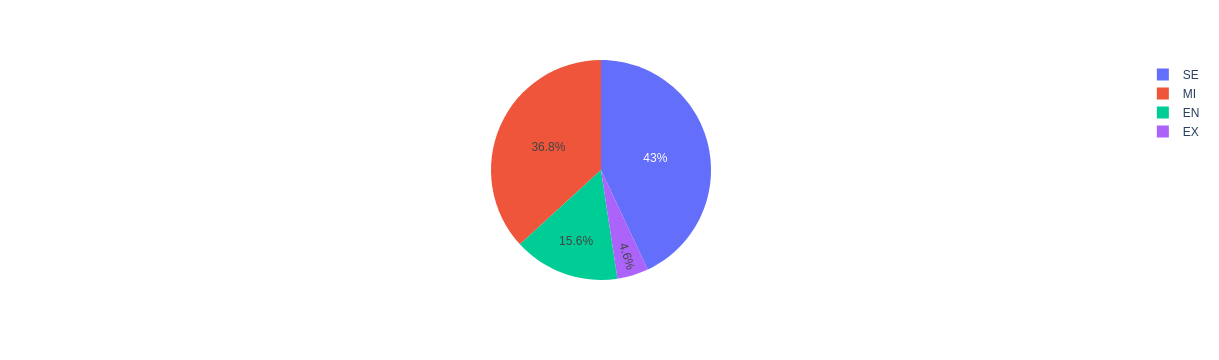

In [66]:
px.pie(df_count, values='count', names='experience_level')

In [67]:
@interact(categorical_column=['experience_level', 'employment_type', 'remote_ratio', 'company_size'])
def pie_plot(categorical_column):
  df_count = df.stb.freq([categorical_column])
  fig = px.pie(df_count, values='count', names=categorical_column)
  fig.update_layout(title=dict(text=f'<b>{categorical_column}</b>', x=.5))
  fig.show()

interactive(children=(Dropdown(description='categorical_column', options=('experience_level', 'employment_type…

In [68]:
@interact(categorical_column=categorical_columns)
def bar_plot(categorical_column):
  df_count = df.stb.freq([categorical_column])
  fig = px.bar(df_count, y='count', x=categorical_column)
  fig.update_layout(title=dict(text=f'<b>{categorical_column}</b>', x=.5))
  fig.show()

interactive(children=(Dropdown(description='categorical_column', options=('experience_level', 'employment_type…

### Numeric variables

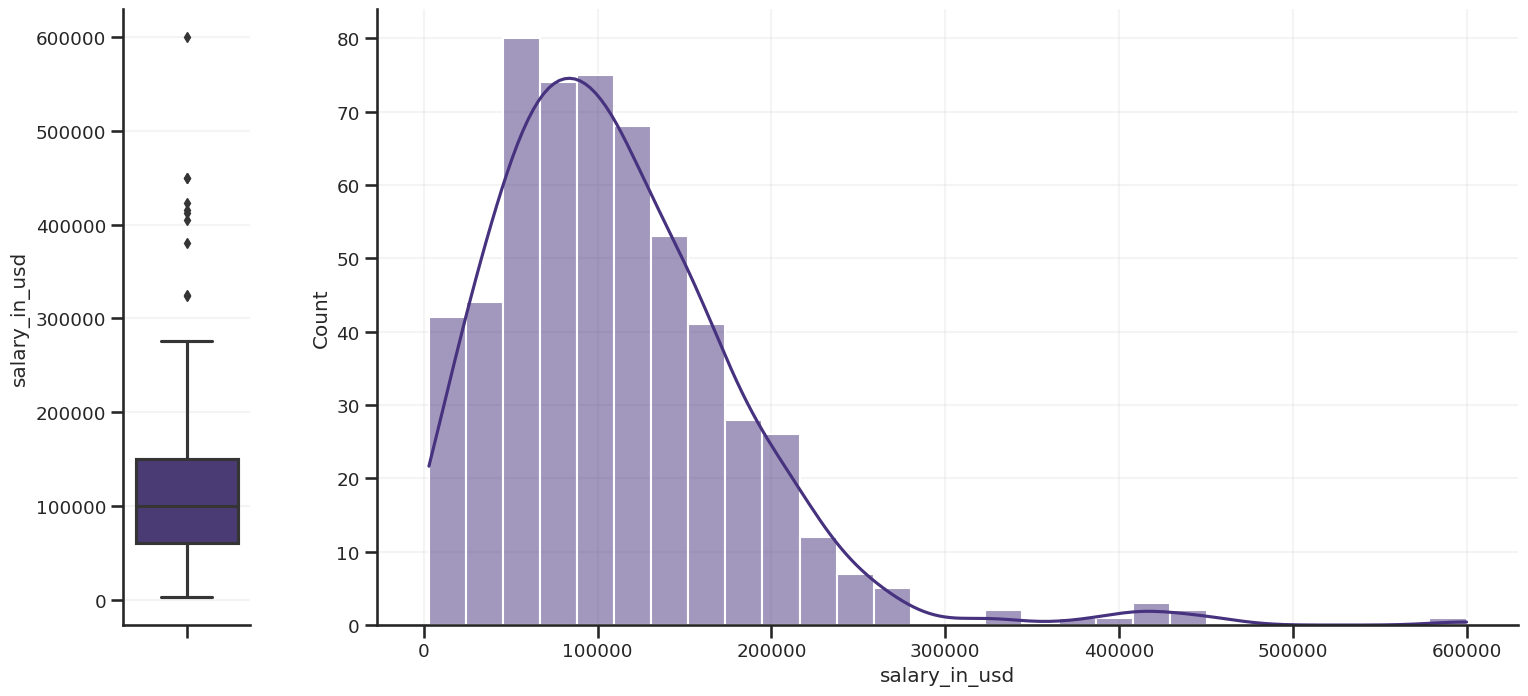

In [71]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8), gridspec_kw={'width_ratios':[.1,.9]})

sns.boxplot(data=df, y='salary_in_usd', ax=axes[0])
sns.histplot(data=df, x='salary_in_usd', kde=True, ax=axes[1])
sns.despine()

plt.show()

In [72]:
stats.skew(df.salary_in_usd)

1.7282336070348854

In [73]:
stats.kurtosis(df.salary_in_usd)

6.38414589529744

# Multivariate analysis

In [74]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [75]:
df2 = df.copy()
df2['experience_level'] = df2.experience_level.astype(str)

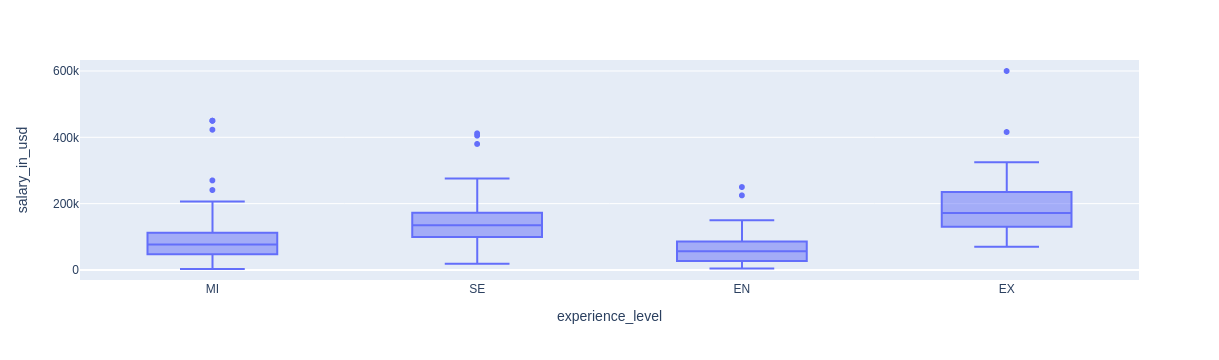

In [76]:
px.box(df2, x='experience_level', y='salary_in_usd', category_orders=['EN','MI','SE','EX'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    category
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    category
 3   job_title           565 non-null    category
 4   salary              565 non-null    int64   
 5   salary_currency     565 non-null    category
 6   salary_in_usd       565 non-null    int64   
 7   employee_residence  565 non-null    category
 8   remote_ratio        565 non-null    category
 9   company_location    565 non-null    category
 10  company_size        565 non-null    category
dtypes: category(9), int64(2)
memory usage: 43.2 KB


<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

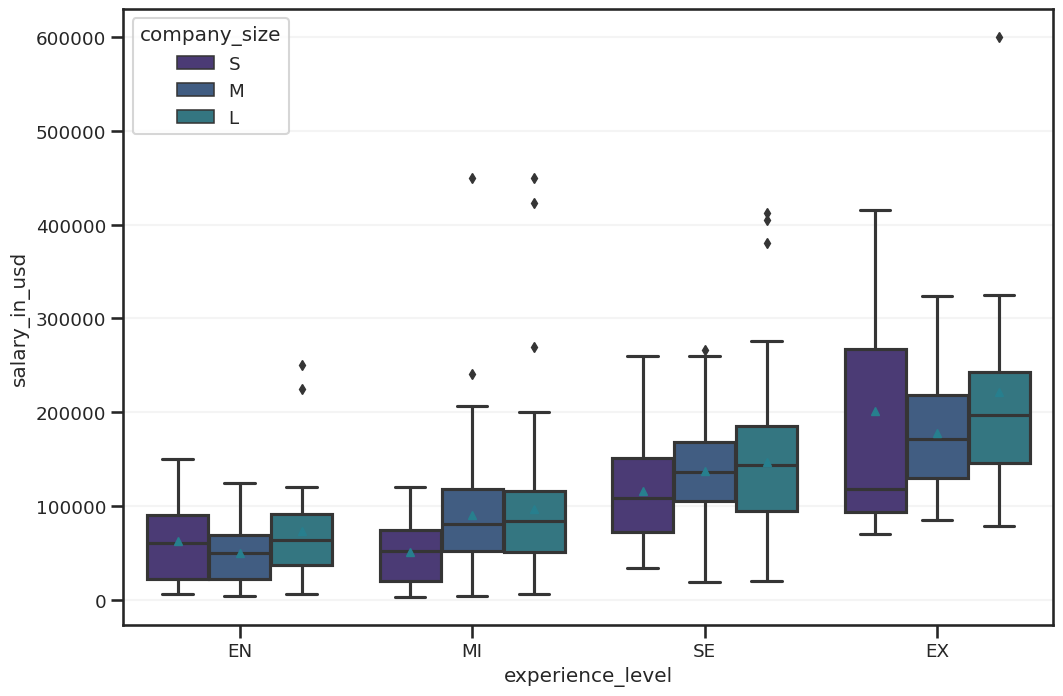

In [78]:
sns.boxplot(
    data=df, x='experience_level', y='salary_in_usd', hue='company_size',
    order=['EN','MI','SE','EX'], hue_order=['S','M','L'], showmeans=True
    )

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

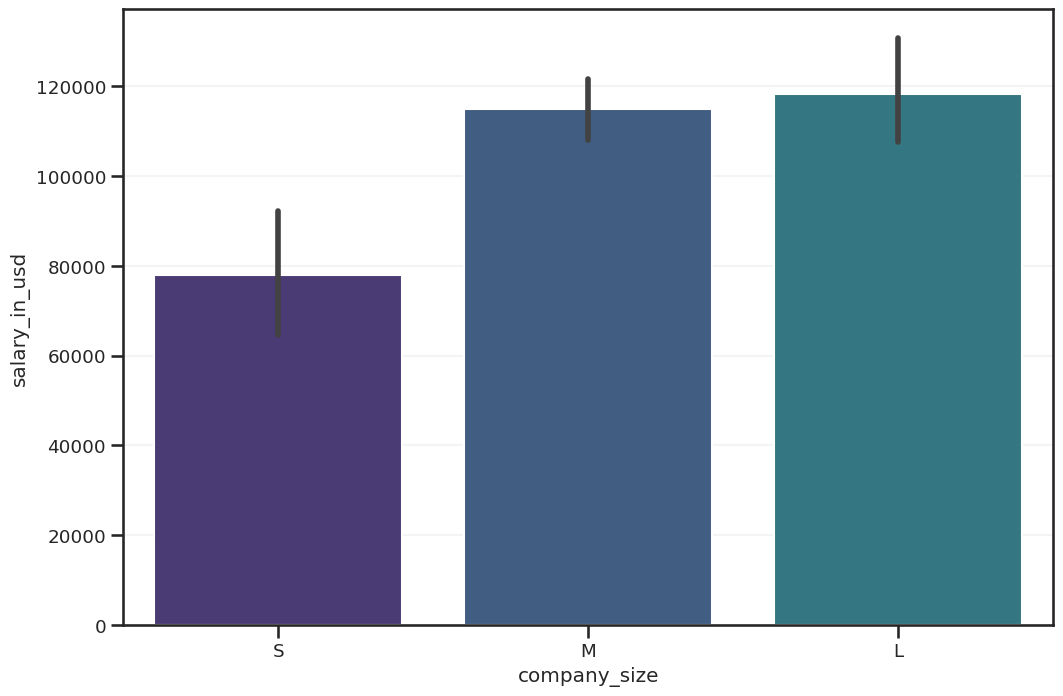

In [79]:
sns.barplot(data=df, x='company_size', y='salary_in_usd', order=['S','M','L'])

In [80]:
crosstab = (
    pd.crosstab(df['experience_level'], df['company_size'])
    .loc[['EN','MI','SE', 'EX'], ['S','M','L']]
    )
crosstab

company_size,S,M,L
experience_level,,,
EN,29,30,29
MI,28,96,84
SE,22,152,69
EX,3,12,11


In [81]:
stats.contingency.association(crosstab)

0.1961418770417252

In [84]:
chi2,p,dof,expected = stats.chi2_contingency(crosstab)

In [85]:
(crosstab - expected).style.background_gradient(cmap='Reds')

company_size,S,M,L
experience_level,,,
EN,16.228319,-15.168142,-1.060177
MI,-2.187611,-10.761062,12.948673
SE,-13.267257,27.274336,-14.007080
EX,-0.773451,-1.345133,2.118584


In [86]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [87]:
@interact(x=df.columns.tolist(), hue=df.columns.tolist())
def plot(x, hue):
  sns.histplot(data=df, x=x, hue=hue, palette='tab10', alpha=.4)
  plt.title(f'{x} by {hue}')
  sns.despine()
  plt.show()

interactive(children=(Dropdown(description='x', options=('work_year', 'experience_level', 'employment_type', '…

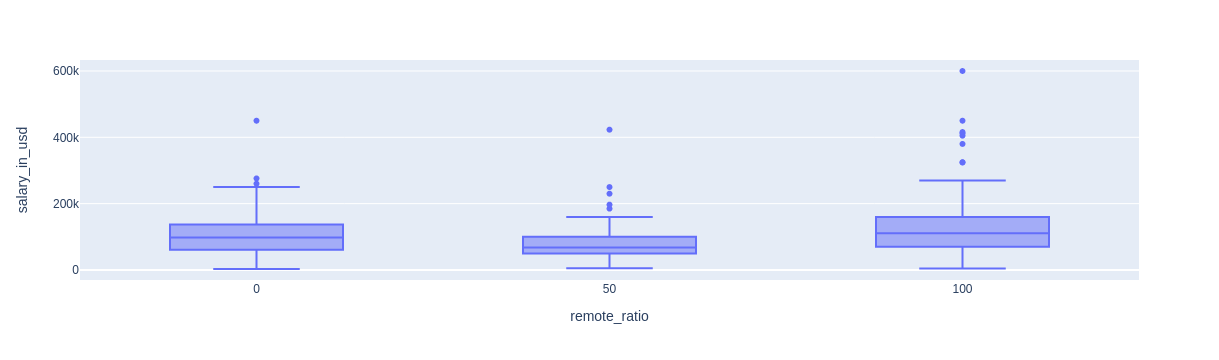

In [88]:
px.box(df, x='remote_ratio', y='salary_in_usd')